In [2]:
class AVLNode:
    def __init__(self, key):
        self.key = key
        self.left = None
        self.right = None
        self.height = 1

In [18]:
class AVLTree:
    def __init__(self):
        self.root = None

    #AJOUT
    def insert(self, key):
        self.root = self._insert(self.root, key)

    def _insert(self, node, key):
        if node is None:
            return AVLNode(key)
        elif key < node.key:
            node.left = self._insert(node.left, key)
        else:
            node.right = self._insert(node.right, key)

        node.height = 1 + max(self._get_height(node.left), self._get_height(node.right))
        
        return self._balance(node, key)

    #SUPPRESSION
    def delete(self, key):
        self.root = self._delete(self.root, key)
    
    def _delete(self, node, key):
        if node is None:
            return node
        elif key < node.key:
            node.left = self._delete(node.left, key)
        elif key > node.key:
            node.right = self._delete(node.right, key)
        else:
            if node.left is None:
                return node.right
            elif node.right is None:
                return node.left
            
            min_node = self._get_min_node(node.right)
            node.key = min_node.key
            node.right = self._delete(node.right, min_node.key)
        
        node.height = 1 + max(self._get_height(node.left), self._get_height(node.right))
        
        return self._balance(node, key)
    
    #RECHERCHE
    def search(self, key):
        return self._search(self.root, key)
    
    def _search(self, node, key):
        if node is None:
            return False
        elif key < node.key:
            return self._search(node.left, key)
        elif key > node.key:
            return self._search(node.right, key)
        else:
            return True
    
    #FONCTIONS UTILES / PRIMITIVES
    def _get_height(self, node):
        if node is None:
            return 0
        return node.height
    def _get_min_node(self, node):
        if node is None or node.left is None:
            return node
        return self._get_min_node(node.left)
    
    def _get_balance(self, node):
        if node is None:
            return 0
        return self._get_height(node.left) - self._get_height(node.right)

    def _balance(self, node, key):
        balance = self._get_balance(node)

        if balance > 1:
            if key < node.left.key:
                return self._rotate_right(node)
            else:
                return self._rotate_left_right(node)
        elif balance < -1:
            if key > node.right.key:
                return self._rotate_left(node)
            else:
                return self._rotate_right_left(node)

        return node
    
    def _rotate_left(self, node):
        y = node.right
        T2 = y.left

        y.left = node
        node.right = T2

        node.height = 1 + max(self._get_height(node.left), self._get_height(node.right))
        y.height = 1 + max(self._get_height(y.left), self._get_height(y.right))

        return y

    def _rotate_right(self, node):
        y = node.left
        T3 = y.right

        y.right = node
        node.left = T3

        node.height = 1 + max(self._get_height(node.left), self._get_height(node.right))
        y.height = 1 + max(self._get_height(y.left), self._get_height(y.right))

        return y
    def _rotate_left_right(self, node):
        node.left = self._rotate_left(node.left)
        return self._rotate_right(node)
    
    def _rotate_right_left(self, node):
        node.right = self._rotate_right(node.right)
        return self._rotate_left(node)
    

## GRAPHVIZ

In [6]:
#graphviz
from graphviz import Digraph

In [7]:
def draw_avl_tree(root):
    dot = Digraph()
    
    def traverse(node):
        if node is None:
            return
        
        dot.node(str(node.key), str(node.key))
        
        if node.left is not None:
            dot.edge(str(node.key), str(node.left.key), label="L")
            traverse(node.left)
        
        if node.right is not None:
            dot.edge(str(node.key), str(node.right.key), label="R")
            traverse(node.right)
    
    traverse(root)
    return dot


## TEST INSERT

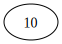

In [9]:
# Create an instance of AVLTree
avl_tree = AVLTree()

# Insert nodes into the AVL tree
avl_tree.insert(10)
dot = draw_avl_tree(avl_tree.root)
dot



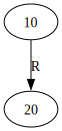

In [10]:

avl_tree.insert(20)
dot = draw_avl_tree(avl_tree.root)
dot

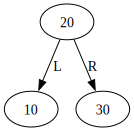

In [11]:

avl_tree.insert(30)
dot = draw_avl_tree(avl_tree.root)
dot

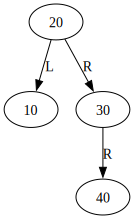

In [12]:

avl_tree.insert(40)
dot = draw_avl_tree(avl_tree.root)
dot

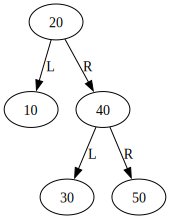

In [13]:

avl_tree.insert(50)
dot = draw_avl_tree(avl_tree.root)
dot

## TEST DELETE & SEARCH

True
False


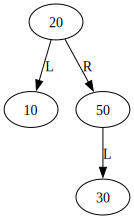

In [22]:
# Create an instance of AVLTree
avl_tree = AVLTree()

# Insert nodes into the AVL tree
avl_tree.insert(10)
avl_tree.insert(20)
avl_tree.insert(30)
avl_tree.insert(40)
avl_tree.insert(50)


# # Delete a node from the AVL tree
avl_tree.delete(40)

# # # Search for a node in the AVL tree
print(avl_tree.search(30))  # Output: True
print(avl_tree.search(40))  # Output: False

# # Visualize the AVL tree
dot = draw_avl_tree(avl_tree.root)
dot
# dot.render('avl_tree_example', format='png', view=True)